# <b>Assignment 1: Predict diabetes using Perceptron</b>




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
from helper import *

## <b>1: Exploratory Data Analysis (EDA)</b>


### 1.1 Visualization

In [3]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/var/folders/wk/m8g2bm7n2z92gnr31mq5bbm40000gn/T/ipykernel_13082/912216212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


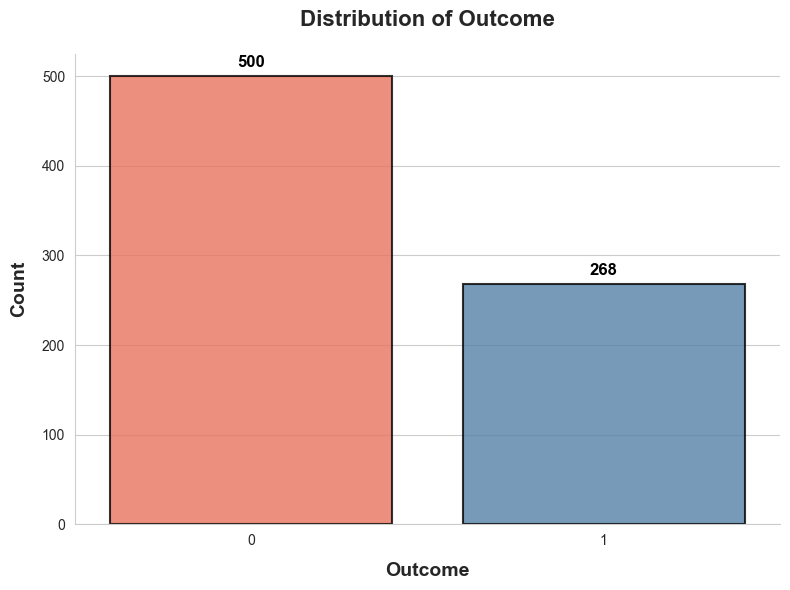

In [5]:
# Set style for the plot
sns.set_style('whitegrid')

# Create a count plot with customized aesthetics
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x=dataset['Outcome'], 
    palette=['#FF6347', '#4682B4'],
    alpha=0.8,
    edgecolor='black',
    linewidth=1.5
)

# Customize bar labels with more vertical space
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height() + 10),  # Add vertical offset
        ha='center', 
        va='baseline', 
        fontsize=12, 
        color='black', 
        fontweight='bold'
    )

# Set title and labels with improved font sizes and styles
plt.xlabel('Outcome', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Count', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Distribution of Outcome', fontsize=16, fontweight='bold', pad=20)

# Remove top and right borders for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()

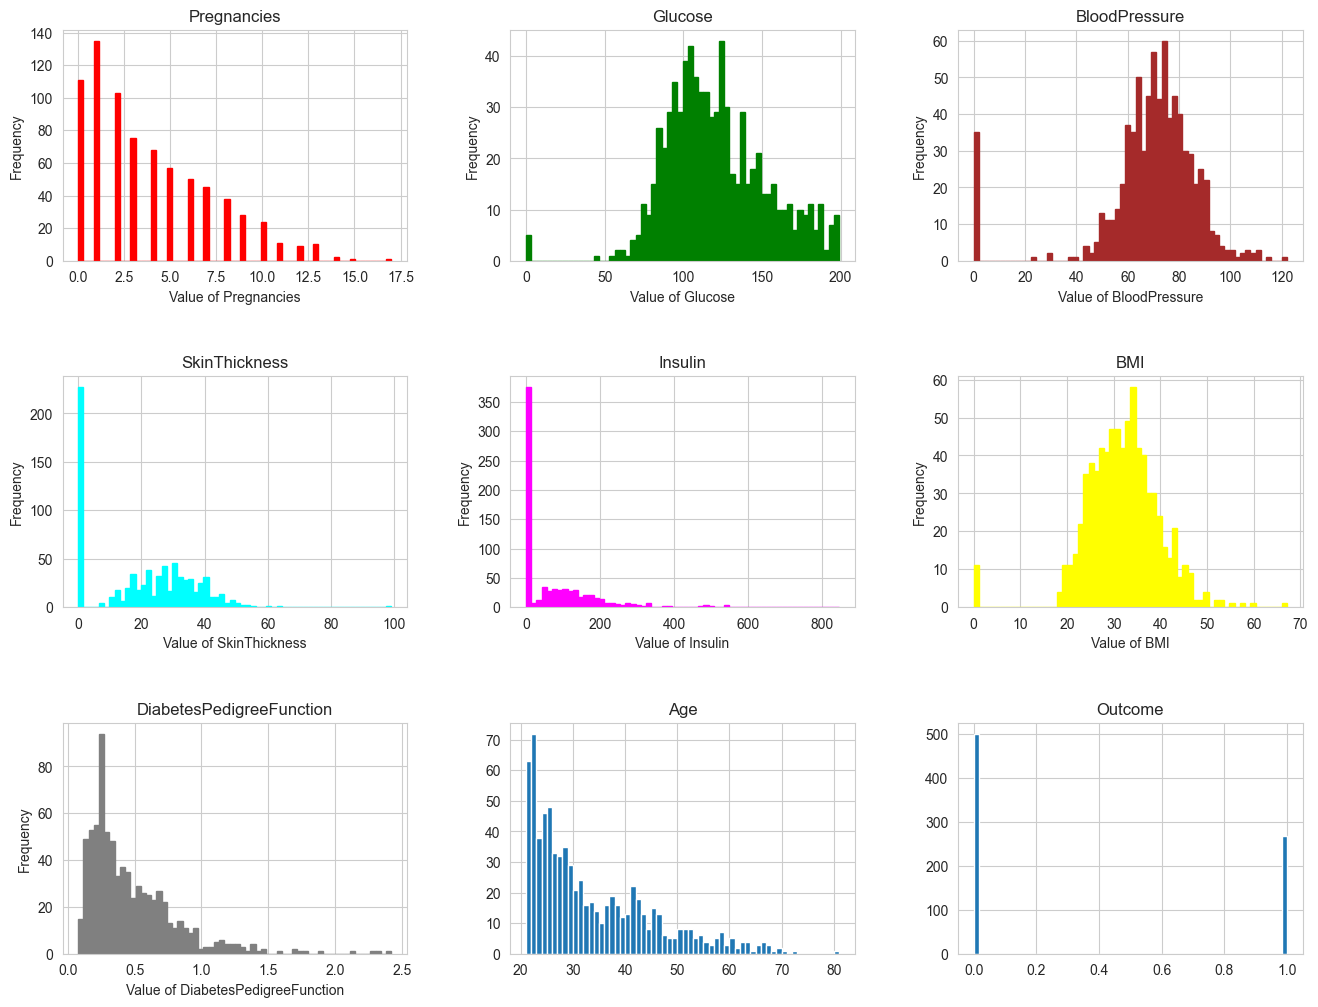

In [6]:
# Visualization using histogram

axes = dataset.hist(bins=60, figsize=(16, 12))
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
colors = ['red', 'green', 'brown', 'cyan', 'magenta', 'yellow', 'grey']

for ax, feature, color in zip(axes.flatten(), features, colors):
    ax.set_xlabel('Value of ' + feature)
    ax.set_ylabel('Frequency')
    
    for elem in ax.patches:
        elem.set_color(color)

plt.subplots_adjust(hspace=0.5)
plt.show()

### 1.2 Data Pre-processing

In [7]:
# Remove 0 from Glucose, BloodPressure, SkinThickness, Insulin, BMI
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset[columns_to_impute] = dataset[columns_to_impute].replace(0, np.nan)

In [8]:
dataset.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
# Define X and y variables
X = dataset.drop('Outcome', axis=1) # feature variable
y = dataset['Outcome'].copy() # target variables

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47


In [10]:
# Preprocessing pipeline with imputation and scaling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('robust_scaler', RobustScaler())
])

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X_transformed = pipeline.fit_transform(X)
X_new = pd.DataFrame(X_transformed, columns=X.columns)
X_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,0.000,0.857143,0.000000,0.142857,0.665359,1.235294
1,-0.4,-0.790123,-0.375,0.000000,0.000000,-0.626374,-0.056209,0.117647
2,1.0,1.629630,-0.500,0.000000,0.000000,-0.989011,0.783007,0.176471
3,-0.4,-0.691358,-0.375,-0.857143,-5.391304,-0.461538,-0.537255,-0.470588
4,-0.6,0.493827,-2.000,0.857143,7.478261,1.186813,5.007843,0.235294
...,...,...,...,...,...,...,...,...
763,1.4,-0.395062,0.250,2.714286,9.565217,0.065934,-0.526797,2.000000
764,-0.2,0.123457,-0.125,-0.285714,0.000000,0.494505,-0.084967,-0.117647
765,0.4,0.098765,0.000,-0.857143,-2.260870,-0.670330,-0.333333,0.058824
766,-0.4,0.222222,-0.750,0.000000,0.000000,-0.241758,-0.061438,1.058824


In [11]:
# Check NaN values again
check_na = X_new.isna().sum()
check_na

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

## <b>2: Predicting with Single Layer Perceptron (SLP)</b>

### 2.1 Baseline Model

In [14]:
# Baseline model of a single-layer Perceptron using TensorFlow
def baseline_model(activation_function='softmax', loss_function='sparse_categorical_crossentropy', optimizer='SGD', learning_rate=0.001, **kwargs):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, activation=activation_function, input_shape=(X_train.shape[1],))  # Softmax for binary classification
    ])
    
    # Ensure optimizer instance is created correctly even when default parameter is used
    if isinstance(optimizer, str):
        optimizer_instance = tf.keras.optimizers.get({'class_name': optimizer, 'config': {'learning_rate': learning_rate}})
    else:
        optimizer_instance = optimizer

    model.compile(optimizer=optimizer_instance, loss=loss_function, metrics=['accuracy'])
    return model

In [15]:
# Number of epochs
num_epochs = 100

bl_model = baseline_model()

# Train the baseline model
history_bl = bl_model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val))

Epoch 1/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.6562 - loss: 0.9352

/Users/quocanh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5281 - loss: 1.6461 - val_accuracy: 0.4390 - val_loss: 2.1599
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4738 - loss: 1.7475 - val_accuracy: 0.4309 - val_loss: 1.9719
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 1.4624 - val_accuracy: 0.4309 - val_loss: 1.8054
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4857 - loss: 1.4503 - val_accuracy: 0.4146 - val_loss: 1.6693
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4769 - loss: 1.2477 - val_accuracy: 0.3984 - val_loss: 1.5518
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4406 - loss: 1.2613 - val_accuracy: 0.3821 - val_loss: 1.4658
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4617 - loss: 1.1898 - val_accuracy: 0.3740 - val_loss: 1.4018
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4393 - loss: 1.1856 - val_accuracy: 0.3740 - val_loss: 1.3

Baseline Model Evaluation:
Test Loss: 0.6440 - Test Accuracy: 0.6623
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.6296 - loss: 0.6457
Accuracy:  0.6623376623376623
Precision:  0.5319148936170213
Recall:  0.45454545454545453
F1 Score:  0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        99
           1       0.53      0.45      0.49        55

    accuracy                           0.66       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.65      0.66      0.66       154



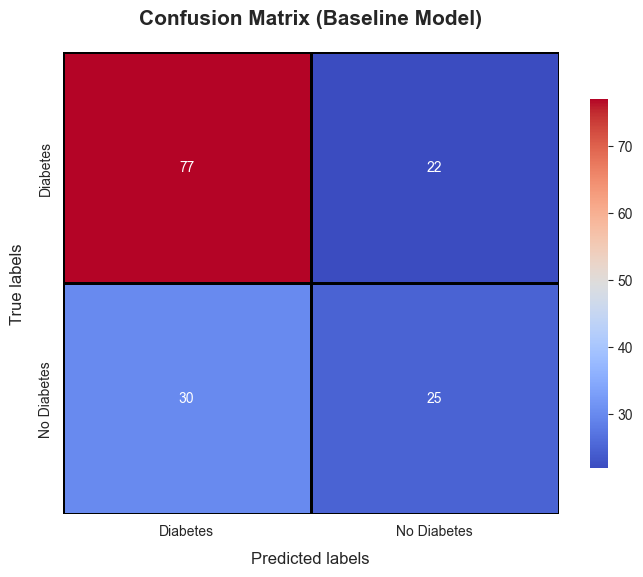

In [16]:
print('Baseline Model Evaluation:')
accuracy_bl = evaluate_model(bl_model, X_test, y_test, 'Baseline Model')

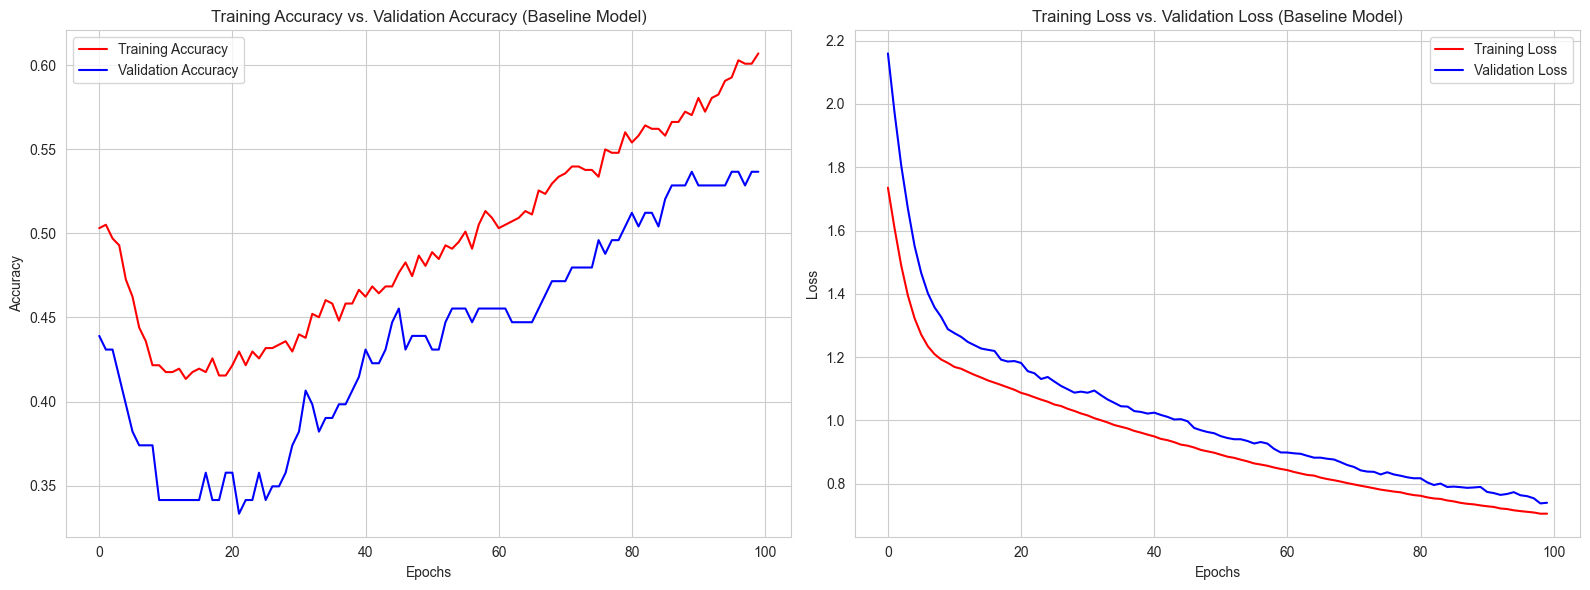

In [17]:
# Plot the learning curves
plot_learning_curves(history_bl, 'Baseline Model')

In [18]:
flops_single_perceptron = calculate_flops_from_model(bl_model)
gflops_single_perceptron = to_gflops(flops_single_perceptron)
efficiency_bl = accuracy_bl/flops_single_perceptron

print(f'Single Perceptron Model FLOPs: {flops_single_perceptron}')
print(f'Single Perceptron Model GFLOPs: {gflops_single_perceptron}')
print(f'Accuracy Baseline Model: {accuracy_bl}')
print(f'Baseline Model Efficiency: {efficiency_bl}')

Single Perceptron Model FLOPs: 34
Single Perceptron Model GFLOPs: 3.4e-08
Accuracy Baseline Model: 0.6623376623376623
Baseline Model Efficiency: 0.01948051948051948


### 2.2 Experiment: Hyperparameter Tuning with GridSearchCV

In [19]:
model = KerasClassifier(model=baseline_model, epochs=50, batch_size=32, verbose=0)

param_grid = {
    'model__activation': ['relu', 'sigmoid', 'softmax', 'tanh'],
    'model__loss_function': ['sparse_categorical_crossentropy', 'binary_crossentropy', 'hinge'],
    'model__optimizer': ['SGD', 'Adam', 'Nadam', 'RMSprop'],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

In [20]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

/Users/quocanh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/quocanh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/quocanh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Experiment - Hyperparameter Tuning:
Best: 0.7760 using {'batch_size': 16, 'epochs': 100, 'model__activation': 'relu', 'model__learning_rate': 0.001, 'model__loss_function': 'sparse_categorical_crossentropy', 'model__optimizer': 'Adam'}
Test Loss: 0.5003 - Test Accuracy: 0.7727
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.7493 - loss: 0.5138
Accuracy:  0.7727272727272727
Precision:  0.6923076923076923
Recall:  0.6545454545454545
F1 Score:  0.6728971962616822

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



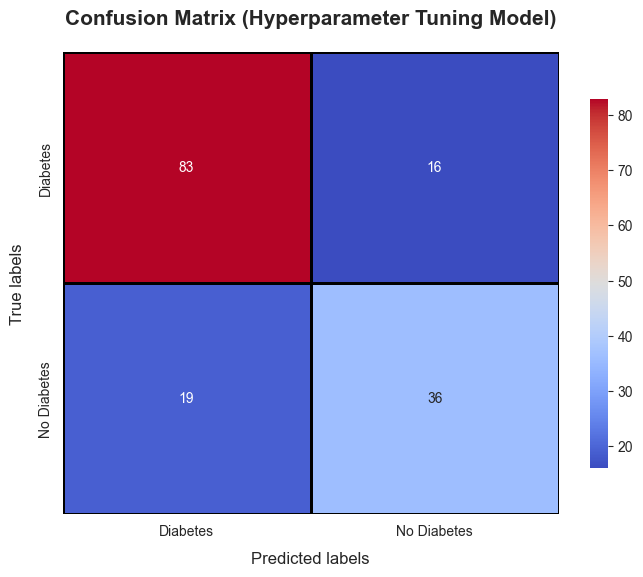

In [21]:
# Print the best parameters and score
print('Experiment - Hyperparameter Tuning:')
print(f'Best: {grid_result.best_score_:.4f} using {grid_result.best_params_}')

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_.model_
accuracy_gridsearch_perceptron = evaluate_model(best_model, X_test, y_test, model_name='Hyperparameter Tuning Model')

In [22]:
# Extract the best parameters from GridSearchCV results
best_params = grid_result.best_params_

# Use the best parameters to create the best model using the modified baseline_model function
best_model = baseline_model(
    activation_function=best_params['model__activation'],
    learning_rate=best_params['model__learning_rate'],
    optimizer=best_params['model__optimizer']
)

/Users/quocanh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
history_gridsearch = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size']
)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3581 - loss: 8.1906 - val_accuracy: 0.3571 - val_loss: 8.1803
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.3858 - loss: 7.1377 - val_accuracy: 0.3636 - val_loss: 7.8805
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.3678 - loss: 7.0609 - val_accuracy: 0.3766 - val_loss: 7.5326
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3784 - loss: 6.6564 - val_accuracy: 0.3831 - val_loss: 7.3311
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.3513 - loss: 6.3268 - val_accuracy: 0.3896 - val_loss: 7.1494
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.3699 - loss: 5.9061 - val_accuracy: 0.3961 - val_loss: 6.8556
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.3841 - loss: 6.2248 - val_accuracy: 0.3896 - val_loss: 6.8404
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.3779 - loss: 5.8082 - val_accuracy

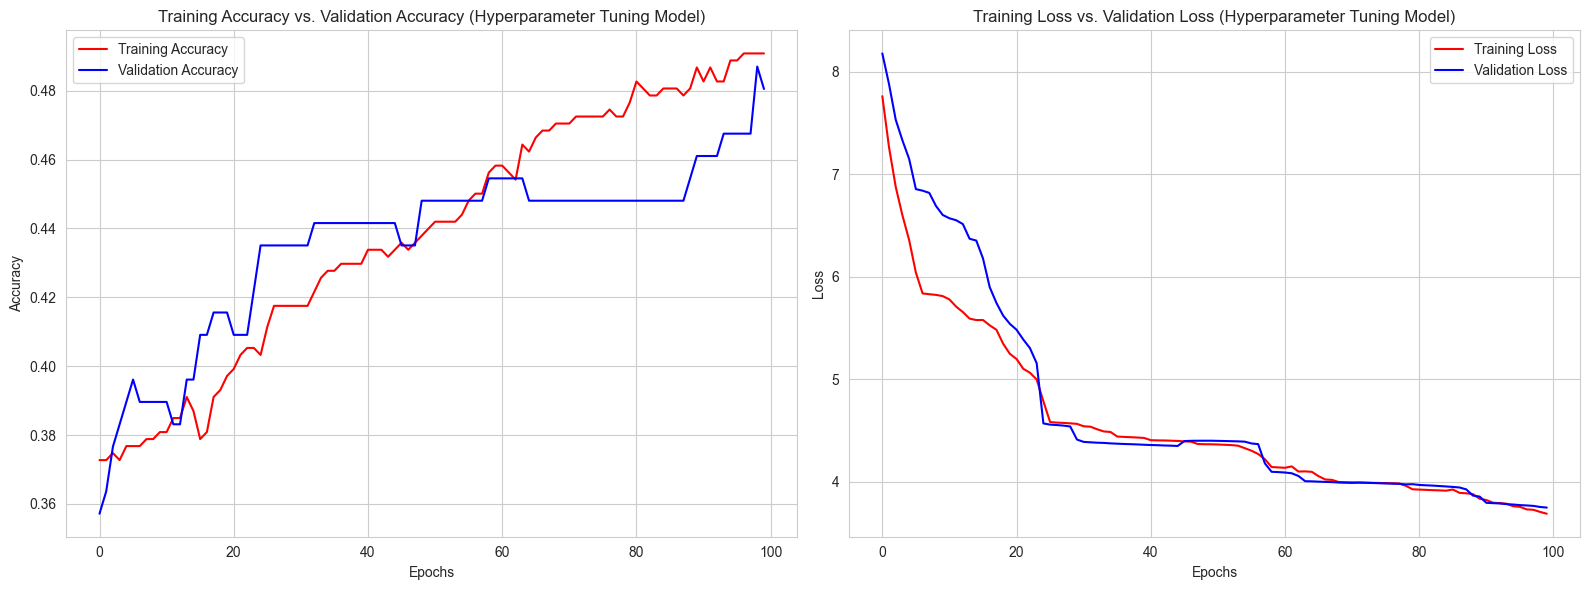

In [24]:
# Plot the learning curves
plot_learning_curves(history_gridsearch, 'Hyperparameter Tuning Model')

/Users/quocanh/Desktop/University of Adelaide/In-uni/Trimester 3/COMP SCI 7318/Assignment/Assignment 1/Version 4 (Current)/helper.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model__activation', y='accuracy', data=params_df, ax=axes[0, 0], palette='viridis')
/Users/quocanh/Desktop/University of Adelaide/In-uni/Trimester 3/COMP SCI 7318/Assignment/Assignment 1/Version 4 (Current)/helper.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model__optimizer', y='accuracy', data=params_df, ax=axes[0, 1], palette='coolwarm')


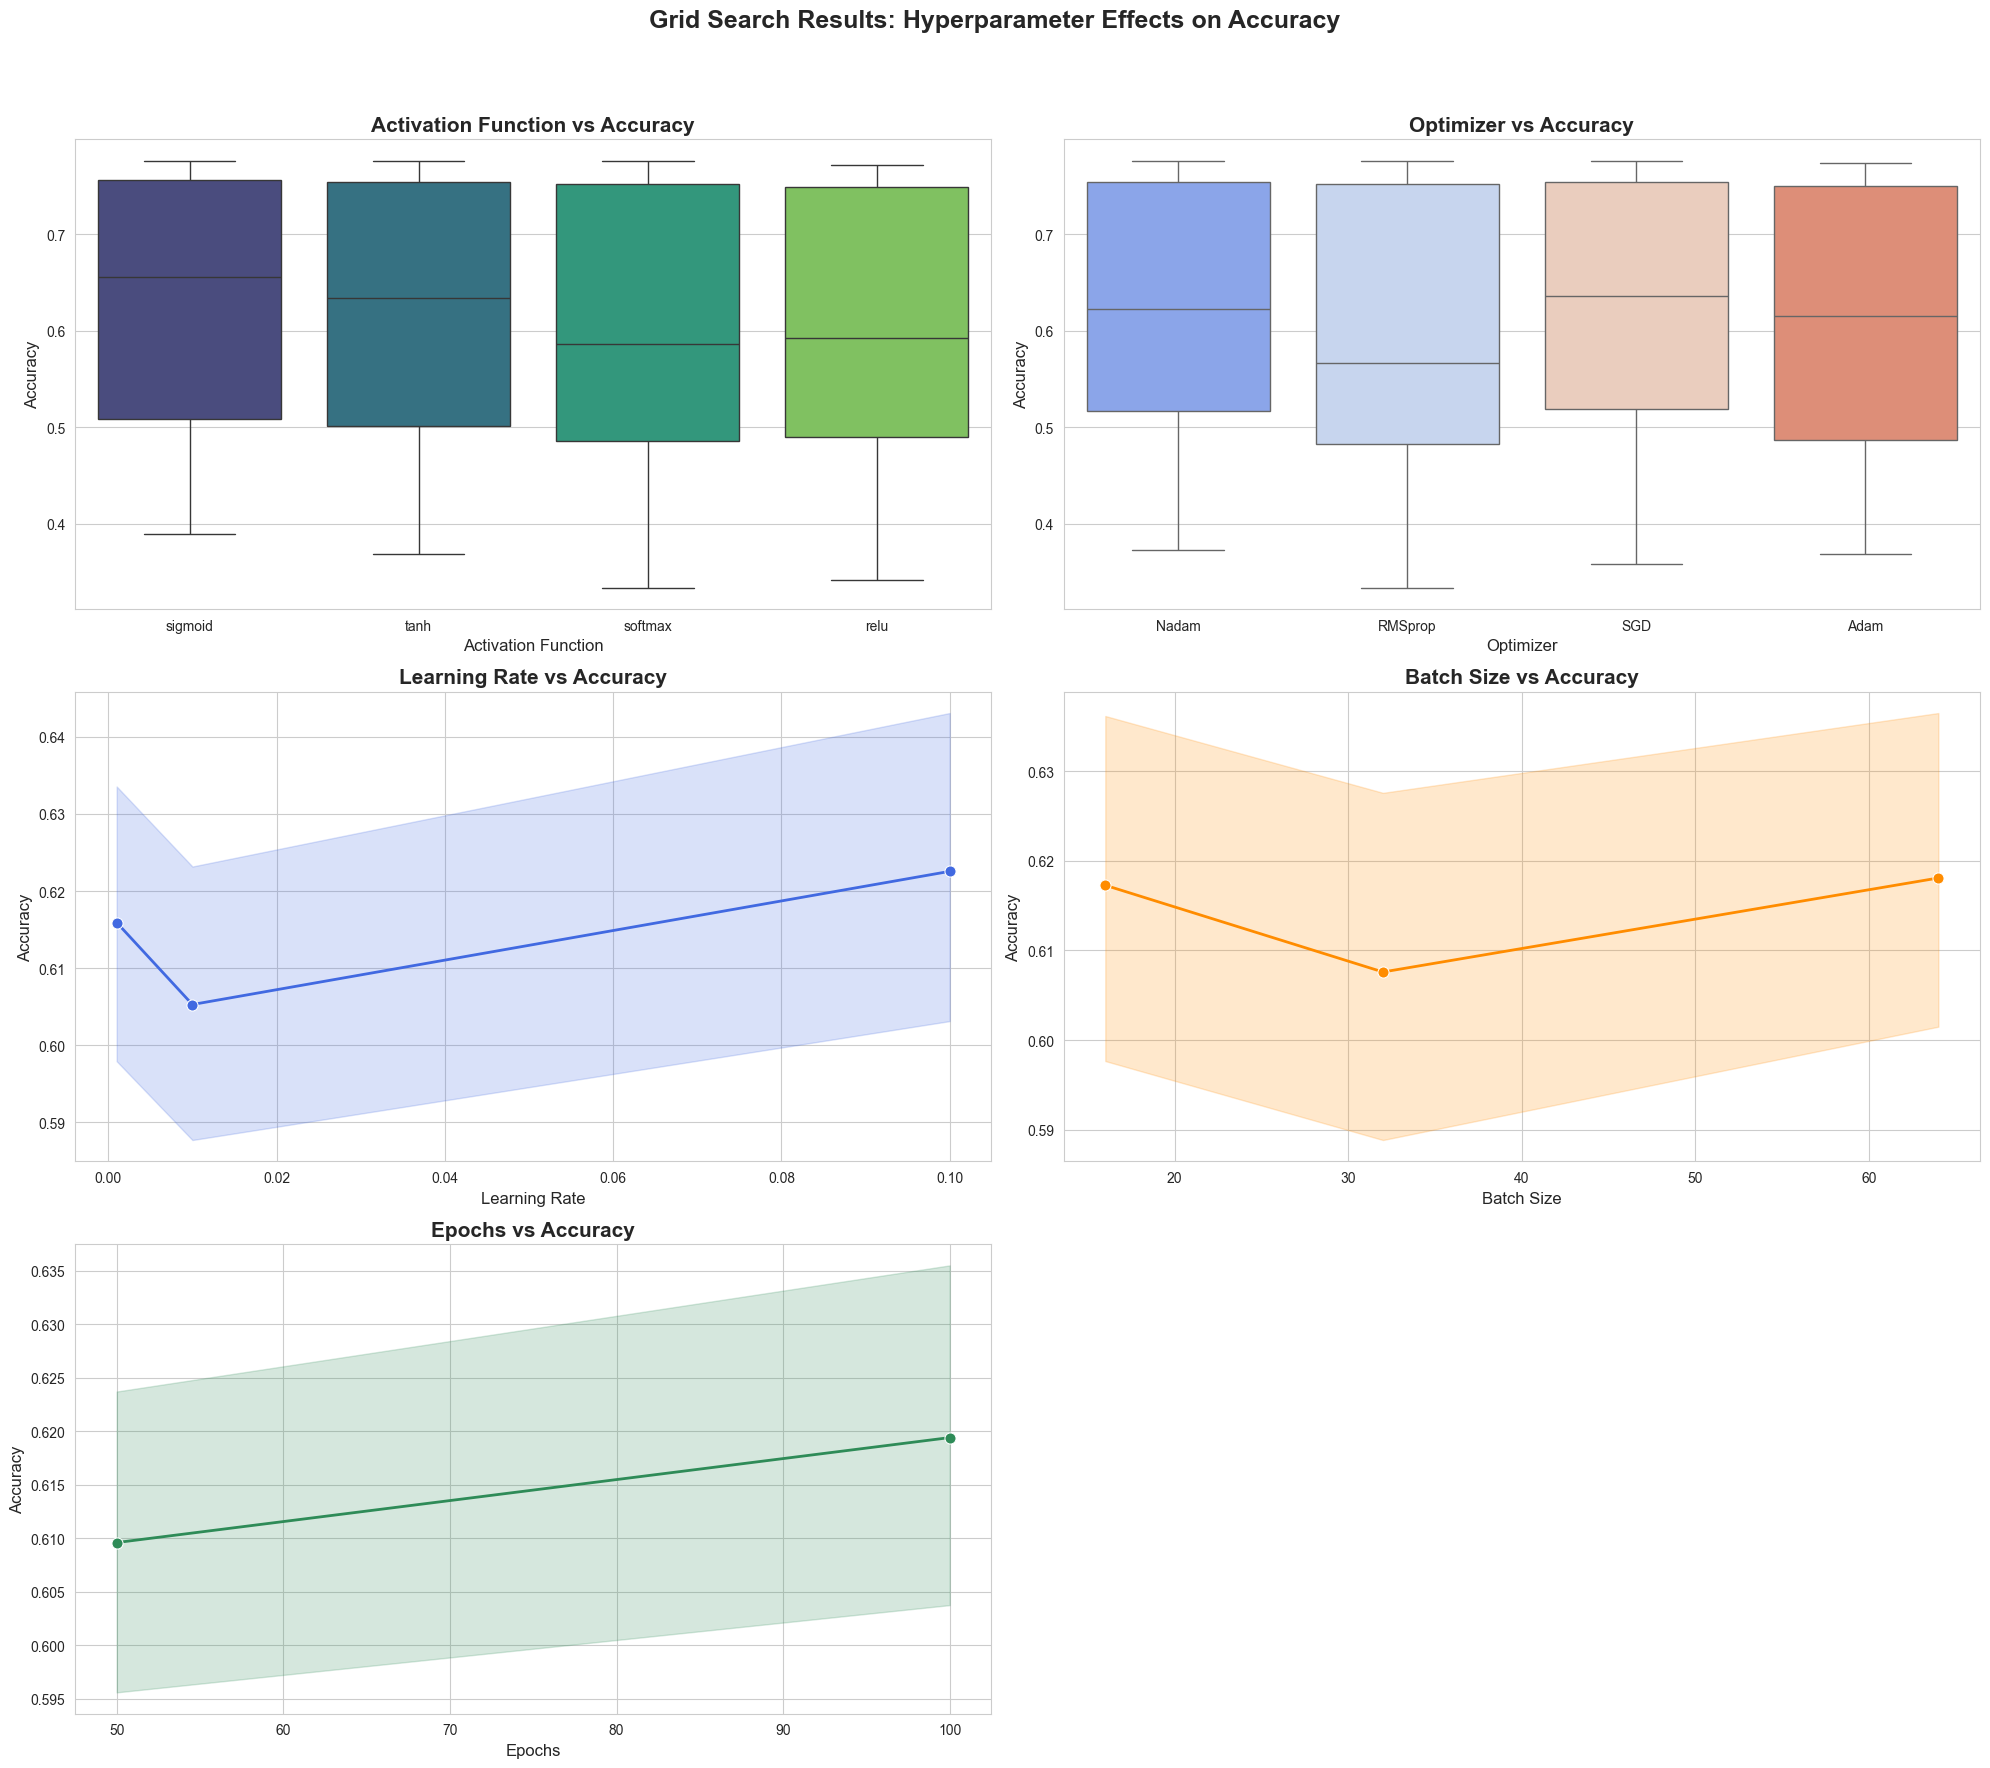

In [25]:
visualize_gridsearch(grid_result)

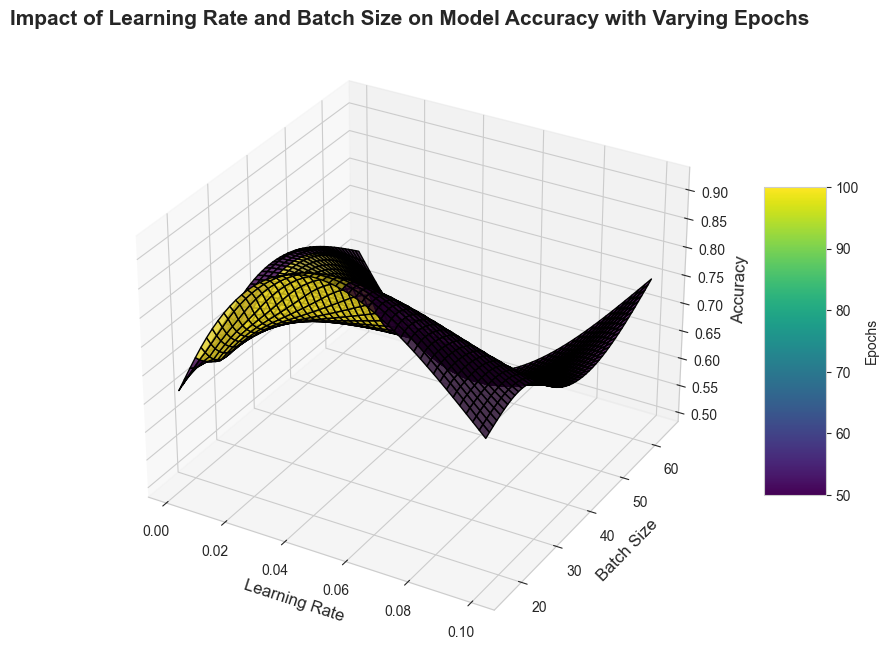

In [26]:
visualize_3d_gridsearch(grid_result)

In [27]:
# Assuming best_model is defined from GridSearchCV
flops_gridsearch_perceptron = calculate_flops_from_model(best_model)
gflops_gridsearch_perceptron = to_gflops(flops_gridsearch_perceptron)
efficiency_gridsearch_perceptron = accuracy_gridsearch_perceptron/flops_gridsearch_perceptron

print(f'GridSearchCV Perceptron Model FLOPs: {flops_gridsearch_perceptron}')
print(f'GridSearchCV Perceptron Model GFLOPs: {gflops_gridsearch_perceptron}')
print(f'Accuracy GridSearchCV Perceptron Model: {accuracy_gridsearch_perceptron}')
print(f'GridSearchCV Perceptron Model Efficiency: {efficiency_gridsearch_perceptron}')

GridSearchCV Perceptron Model FLOPs: 34
GridSearchCV Perceptron Model GFLOPs: 3.4e-08
Accuracy GridSearchCV Perceptron Model: 0.7727272727272727
GridSearchCV Perceptron Model Efficiency: 0.022727272727272728


## <b>3: Predicting with Multi-layer Perceptron (MLP)</b>

In [28]:
# Define the MLP model in TensorFlow
def mlp_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
        tf.keras.layers.Dense(512, activation='relu'),  # Second hidden layer
        tf.keras.layers.Dense(256, activation='relu'),  # New third hidden layer
        tf.keras.layers.Dense(256, activation='relu'),  # New fourth hidden layer
        tf.keras.layers.Dense(128, activation='relu'),  # New fifth hidden layer
        tf.keras.layers.Dense(10, activation='softmax')  # Output layer
    ])
    
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [29]:
# Create the MLP model
mlp_model_instance = mlp_model()

# Train the MLP model on the dataset
num_epochs = 500
history_mlp = mlp_model_instance.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val))

Epoch 1/500


/Users/quocanh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0018 - loss: 2.4244 - val_accuracy: 0.0325 - val_loss: 2.2717
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0976 - loss: 2.2428 - val_accuracy: 0.3740 - val_loss: 2.1493
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3649 - loss: 2.1429 - val_accuracy: 0.5366 - val_loss: 2.0691
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5759 - loss: 2.0556 - val_accuracy: 0.6829 - val_loss: 2.0057
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6224 - loss: 1.9752 - val_accuracy: 0.6911 - val_loss: 1.9481
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6376 - loss: 1.9339 - val_accuracy: 0.6992 - val_loss: 1.8951
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - loss: 1.8739 - val_accuracy: 0.6911 - val_loss: 1.8463
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6494 - loss: 1.8409 - val_accuracy: 0.6829 - val_loss: 1.7

MLP Model Evaluation:
Test Loss: 0.6129 - Test Accuracy: 0.7662
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x2a2158b80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7502 - loss: 0.5966 
Accuracy:  0.7662337662337663
Precision:  0.7317073170731707
Recall: 

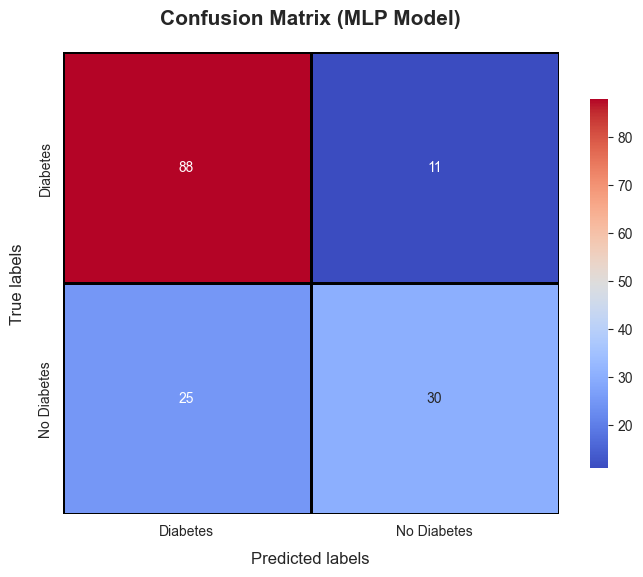

In [30]:
# Evaluate the MLP model on the test set
print('MLP Model Evaluation:')
accuracy_mlp = evaluate_model(mlp_model_instance, X_test, y_test, 'MLP Model')

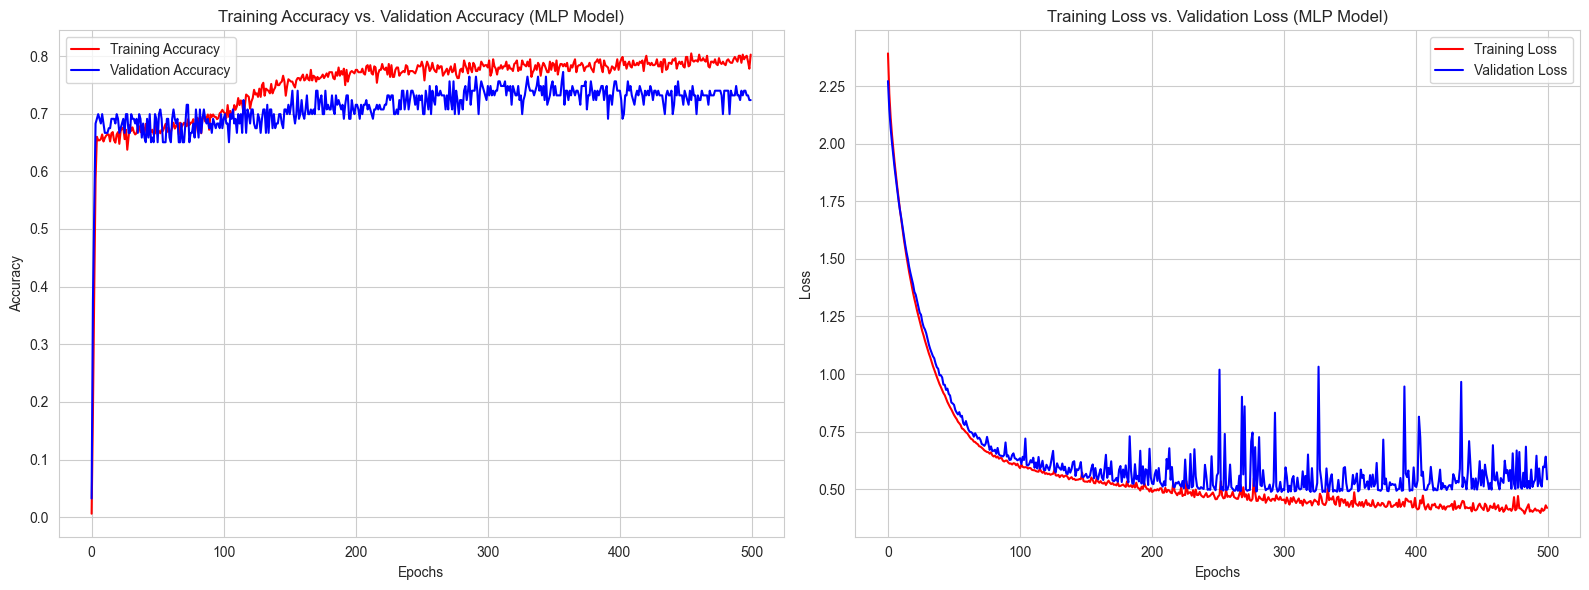

In [31]:
# Plot the learning curves
plot_learning_curves(history_mlp, 'MLP Model')

In [32]:
flops_mlp = calculate_flops_from_model(mlp_model_instance)
gflops_mlp = to_gflops(flops_mlp)
efficiency_mlp = accuracy_mlp/flops_mlp

print(f'MLP Model FLOPs: {flops_mlp}')
print(f'MLP Model GFLOPs: {gflops_mlp}')
print(f'Accuracy MLP Model: {accuracy_mlp}')
print(f'MLP Model Efficiency: {efficiency_mlp}')

MLP Model FLOPs: 995466
MLP Model GFLOPs: 0.000995466
Accuracy MLP Model: 0.7662337662337663
MLP Model Efficiency: 7.697236934599135e-07


## <b>4: Predicting with Residual Multi-Layer Perceptrons</b>

In [33]:
# Define the MLP model with residual connections in TensorFlow
def residual_mlp_model():
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    
    # First hidden layer
    x = tf.keras.layers.Dense(512, activation='relu')(inputs)
    
    # Second hidden layer with residual connection
    x_shortcut = x  # Save the input for residual connection
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.add([x, x_shortcut])  # Add residual connection
    
    # Third hidden layer
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    
    # Fourth hidden layer with residual connection
    x_shortcut = x  # Save the input for residual connection
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.add([x, x_shortcut])  # Add residual connection

    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [34]:
# Create the residual MLP model
residual_model = residual_mlp_model()

# Train the model
history_residual = residual_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2618 - loss: 2.1374 - val_accuracy: 0.5285 - val_loss: 1.7490
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5438 - loss: 1.6257 - val_accuracy: 0.5854 - val_loss: 1.5773
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5948 - loss: 1.4880 - val_accuracy: 0.5691 - val_loss: 1.5020
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6258 - loss: 1.4507 - val_accuracy: 0.5772 - val_loss: 1.5006
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6605 - loss: 1.3376 - val_accuracy: 0.5610 - val_loss: 1.7120
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6556 - loss: 1.3667 - val_accuracy: 0.6667 - val_loss: 1.3330
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6644 - loss: 1.2323 - val_accuracy: 0.6098 - val_loss: 1.3067
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 1.1774 - val_accuracy: 0.6667 - v

MLP Residual Model Evaluation:
Test Loss: 0.5411 - Test Accuracy: 0.7403
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7298 - loss: 0.5456 
Accuracy:  0.7402597402597403
Precision:  0.6229508196721312
Recall:  0.6909090909090909
F1 Score:  0.6551724137931034

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



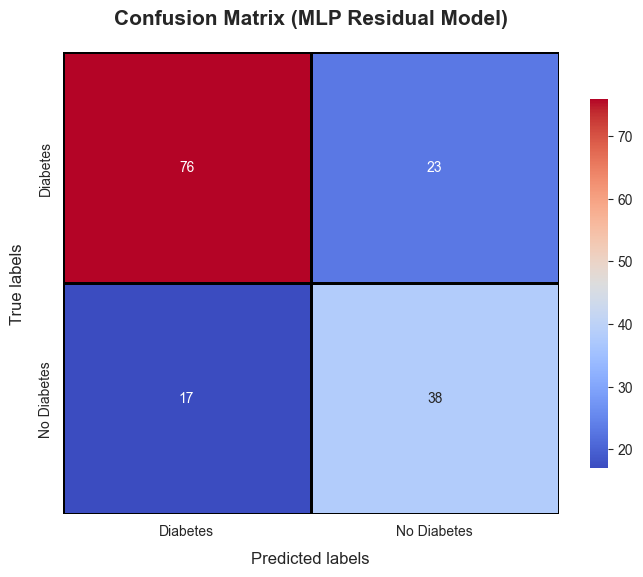

In [35]:
# Evaluate the MLP model on the test set
print('MLP Residual Model Evaluation:')
accuracy_mlp_residual = evaluate_model(residual_model, X_test, y_test, 'MLP Residual Model')

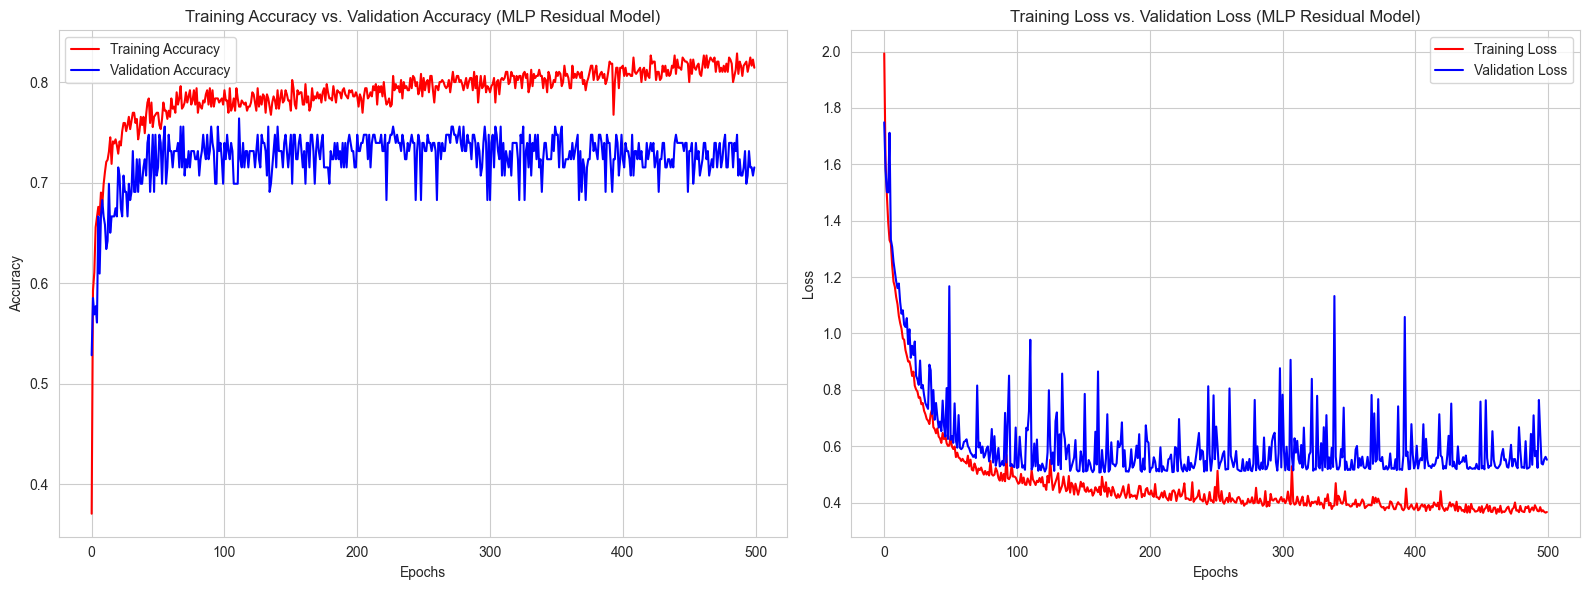

In [36]:
# Plot the learning curves
plot_learning_curves(history_residual, 'MLP Residual Model')

In [37]:
flops_mlp_residual = calculate_flops_from_model(residual_model)
gflops_mlp_residual = to_gflops(flops_mlp_residual)
efficiency_mlp_residual = accuracy_mlp_residual/flops_mlp_residual

print(f'MLP Residual Model FLOPs: {flops_mlp_residual}')
print(f'MLP Residual Model GFLOPs: {gflops_mlp_residual}')
print(f'Accuracy MLP Residual Model: {accuracy_mlp_residual}')
print(f'MLP Model Efficiency: {efficiency_mlp_residual}')

MLP Residual Model FLOPs: 932362
MLP Residual Model GFLOPs: 0.000932362
Accuracy MLP Residual Model: 0.7402597402597403
MLP Model Efficiency: 7.939617233003278e-07
